## Simple Linear Regression

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [12]:
df = pd.read_csv('height-weight.csv')

In [13]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


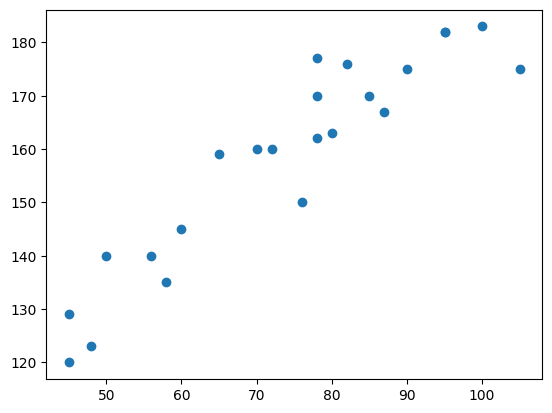

In [14]:
## scatter plot
plt.scatter(df['Weight'], df['Height'])

Text(0, 0.5, 'Weight')

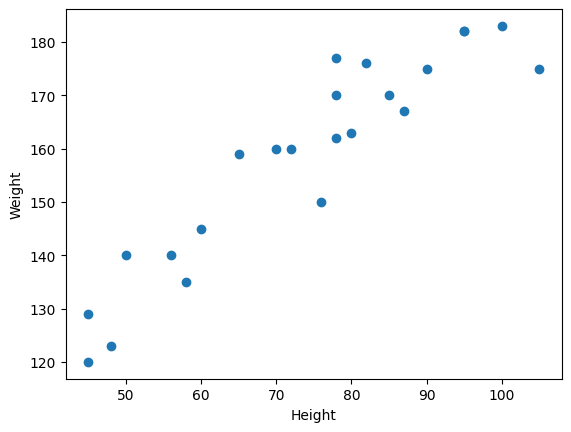

In [15]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [16]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


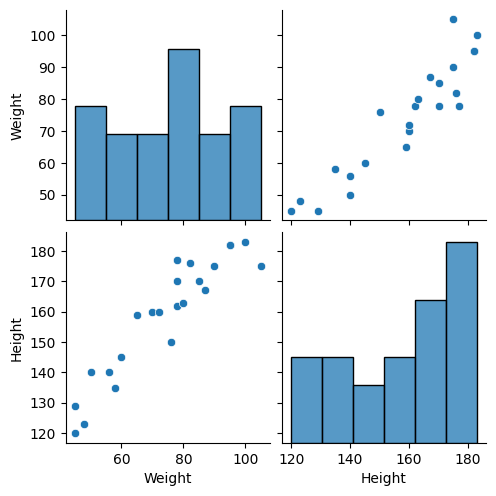

In [17]:
## for visulation
import seaborn as sns
sns.pairplot(df)

## In that one dependent and one independent variable so it make linear regression not multilinear

In [18]:
### Independent and dependent features
x = df['Weight']
x  ## here it create series

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [20]:
## Independent feature shoud be dataframe or 2D array
x = df[['Weight']]   ## independent feature
y = df['Height']  ## dependent feature , this is series and 1 D array
print(type(x))
print(x.shape)  ## 23 row and 1 col
print(y.shape)
x

<class 'pandas.core.frame.DataFrame'>
(23, 1)
(23,)


,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [21]:
np.array(x)  ## it looks like perfect 2D array

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]])

### Train Test Split
Train Test Split is a technique used to evaluate the performance of a machine learning model. It involves dividing the dataset into two parts: a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

Train Data : 80% of the dataset is used for training the model. This data is used to fit the model and learn the underlying patterns in the data.
Test Data : 20% of the dataset is used for testing the model. This data is used to evaluate the model's performance and see how well it generalizes to new, unseen data.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
x_train.shape

(17, 1)

In [24]:
np.array(y_train)

array([135, 183, 162, 123, 182, 129, 145, 160, 150, 140, 140, 160, 175,
       176, 170, 167, 163])

In [25]:
## Standardization

from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  ## fit transform is used for train data
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [27]:
x_test = scaler.transform(x_test)  ## transform is used for test data
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [28]:
## Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [30]:
print('Cofficient or Slope : ', regression.coef_)  ## that is show when we move 1 unit on x-axis then it move 17.29 on y-axis
print('Intercept : ', regression.intercept_)  ## that show starting point of the value, where slope start

Cofficient or Slope :  [17.2982057]
Intercept :  156.47058823529412


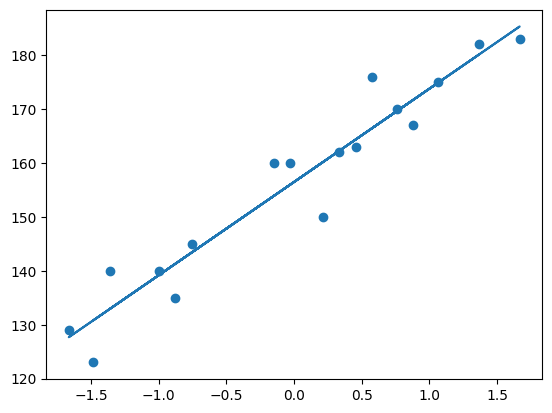

In [31]:
## plot training data plot best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

### Prediction of test data
    Predicted height output = intercept + coef_(weight)
    y_pred = 156.47 + 17.29

In [32]:
## prediction for the test data...
y_pred = regression.predict(x_test)

In [33]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)

MSE :  114.84069295228699
MAE :  9.66512588679501
RMSE :  10.716374991212605


### R square 
Formula

**R^2 = 1 - SSR/SST**


    R^2	=	coefficient of determination
    SSR	=	sum of squares of residuals
    SST	=	total sum of squares

In [35]:
from sklearn.metrics import r2_score

In [36]:
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

    R2: The R2 of the model
    n: The number of observations
    k: The number of predictor variables

In [37]:
## displayed adjusted R-squared
1-(1- score)*(len(y_test)/(len(y_test) - x_test.shape[1]-1))

0.6041240076971914

In [38]:
!pip install statsmodels

In [39]:
## OLS linear regression
import statsmodels.api as sm

In [40]:
model = sm.OLS(y_train, x_train).fit()

In [42]:
prediction = model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [43]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 20 Sep 2025   Prob (F-statistic):                       0.664
Time:                        08:48:59   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Coding\AI_ML_DL\start_course\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [46]:
## for new data
regression.predict(scaler.transform([[72]]))

c:\Coding\AI_ML_DL\start_course\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])